In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr

In [2]:
ticker = "SPY"
years = 5
end_date = dt.date.today()
start_date = end_date - relativedelta(years=years)

hist = yf.Ticker(ticker).history(period=f'{years}y')[['Close']]
days = [i for i in range(1, len(hist['Close'])+1)]
hist_prices = hist['Close'].tolist()

ending_price = []
is_profitable = []

#model variables
log_returns = np.log(1 + hist.pct_change())
mean = log_returns.mean()
var = log_returns.var()
drift = mean - (var * 0.5)
std_dev = log_returns.std()
sim_days = 252 #one year of trading days
iterations = 100


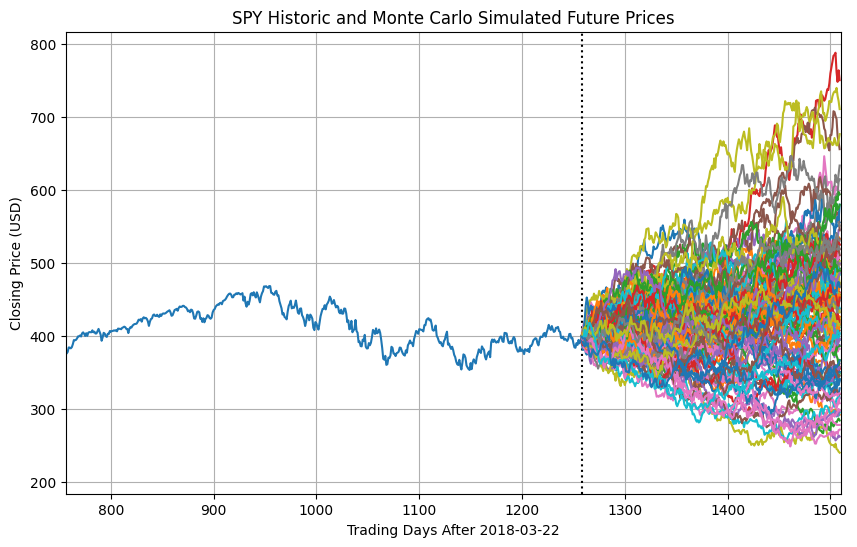

In [3]:
#create plot of historic values
fig = plt.figure(figsize=[10, 6])
plt.plot(days, hist_prices)
plt.title(f"{ticker} Historic and Monte Carlo Simulated Future Prices")
plt.xlabel("Trading Days After " + str(start_date))
plt.ylabel("Closing Price (USD)")
plt.axvline(x=days[-1], label="Current Date", color='black', ls=':')
plt.xlim([756, len(days)+sim_days])
plt.grid()

#generate simulated values and plot them
for i in range(iterations):
    day_num = np.arange(days[-1],days[-1]+sim_days)
    sim_returns = np.exp(drift.values + std_dev.values * norm.ppf(np.random.rand(sim_days)))
    S0 = hist['Close'].iloc[-1]
    sim_prices = np.zeros_like(sim_returns)
    sim_prices[0] = S0
    for t in range(1, sim_days):
        sim_prices[t] = sim_prices[t - 1] * sim_returns[t]
    plt.plot(day_num, sim_prices)
    ending_price.append(sim_prices[-1])
    if sim_prices[-1] > S0:
        is_profitable.append(1)
    else:
        is_profitable.append(0)

In [4]:
#show some summary statistics 
pct_profit = round(100 * (sum(is_profitable) / iterations), 2)
avg_ending = round(sum(ending_price)/iterations, 2)
avg_pct_change = round(100 * ((avg_ending - S0) / S0), 2)
print(f'Average simulated ending price: ${avg_ending}')
print(f'Average percent increase: {avg_pct_change}%')
print(f'Percent of simulated ending prices > current day price: {pct_profit}%')
    

Average simulated ending price: $439.97
Average percent increase: 10.29%
Percent of simulated ending prices > current day price: 65.0%
